## Detecção de Fraudes

### Dados utilizados: 

#### Serão utilizados dados sintéticos para detecção de fraude, disponibilizados pelo Kaggle e gerados com o [Paysim](https://www.kaggle.com/datasets/ealaxi/paysim1).

### Os dados utilizados neste notebook serão uma fração dos dados citados acima, organizados no dataset chamado [Fraud detection example](https://www.kaggle.com/datasets/gopalmahadevan/fraud-detection-example)

***
### **Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação. 
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('data/fraud_dataset_example.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [77]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

### Trazendo para o início as colunas sobre fraude

In [78]:
df = df[['isFraud','isFlaggedFraud','step', 'type', 'amount', 'nameOrig',
         'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest',
         'newbalanceDest']]
df.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


### Renomeando as colunas

In [79]:
df.rename(columns = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',},
     inplace = True)

In [80]:
df.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


### Entendendo melhor a coluna `fraude`

In [83]:
df.groupby('fraude')['tempo'].count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

### Pandas Profiling

In [84]:
# !pip install -U pandas-profiling

In [85]:
# import pandas_profiling

# pandas_profiling.ProfileReport(df)

### Encoding

#### Transformar variáveis categóricas em variáveis numéricas.

#### **Tipos de encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas. Sem hierarquia. Ex.: Get_Dummies.



***
### Utilizando o One-Hot Encoding: dummy

In [86]:
df = pd.get_dummies(data = df, columns = ['tipo'])
df.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0,0,0,1
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1,0,0,0
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


### Removendo os nomes dos clientes e a coluna super fraude, já que não existem registros nessa coluna

In [87]:
df.drop(['cliente1', 'cliente2', 'super_fraude'], axis = 1, inplace = True)

***
### Modelo de Regressão Logística

#### Separando os dados em X e Y

In [88]:
X = df.drop('fraude', axis = 1)
Y = df['fraude']

In [89]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state = SEED)

In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=SEED)

In [91]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [92]:
y_pred = lr.predict(x_test)

In [93]:
from sklearn import metrics

print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Precisão:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

Acurácia: 0.9989765391276965
Precisão: 0.2
Recall: 0.043478260869565216
F1: 0.07142857142857142


### Note que a acurácia está bastante elevda, poré, a precisão está baixa e a sensibilidade também. Lembrando que nossos dados estão desbalanceados, isso significa que o modelo pode ter boa acurácia porque a maior parte dos dados não é fraude.

### F1 é a média harmônica entre a precisão e o recall. Geralmente, quando nossa acurácia é muito alta e o F1 muito baixo, o que acontece nesse caso, a acurácia pode não ser confiável.

***
### Matriz de Confusão

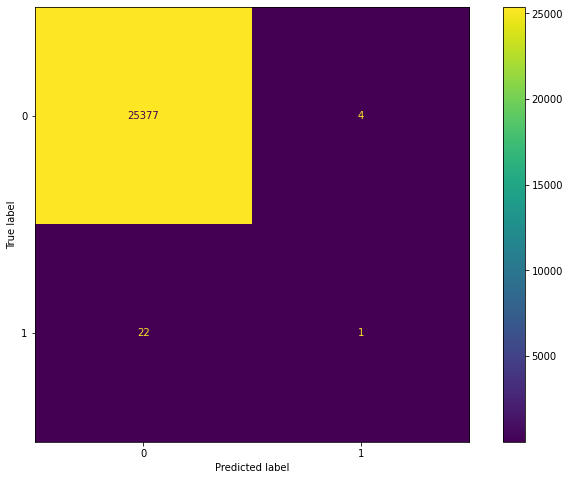

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

### Curva ROC e AUC

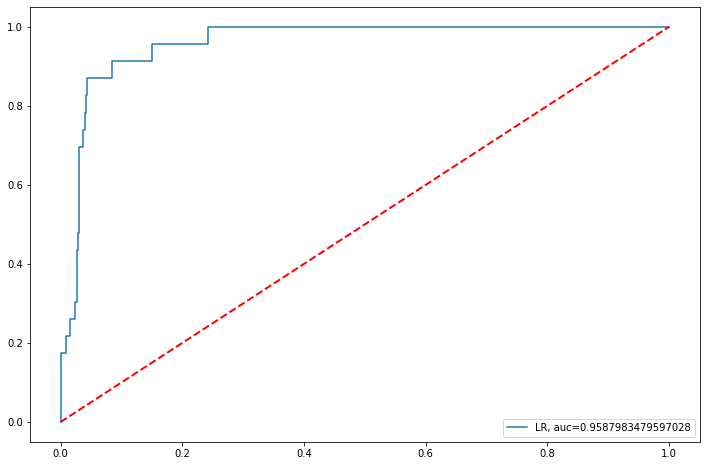

In [95]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = 'LR, auc='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle='--')
plt.legend(loc=4)

Para avaliarmos modelos de classificação, além das métricas que são retiradas da matriz de confusão, podemos utilizar curvas que consideram a performance do modelo em diferentes pontos de corte, conhecidos como “thresholds”. Vamos entender o que são esses pontos de corte.

Na construção de um modelo de classificação, a predição de uma classe está atrelada a uma probabilidade. Imagine que temos uma variável alvo com duas possibilidades (0 ou 1, não fraude e fraude, respectivamente). Se um modelo classifica uma observação como 1, significa que há uma probabilidade de x% de que aquela observação seja da classe 1.

O ponto de corte é um valor de probabilidade no qual: se a probabilidade de predição for maior que esse valor atribui-se a observação à classe 1; se for menor, atribuímos a observação à classe 0. À medida que o ponto de corte varia, os resultados obtidos na classificação se tornam diferentes, fazendo com que o modelo acerte mais de uma classe em detrimento de errar mais outra.

Vamos verificar através de um exemplo. No caso abaixo, estão representados a precisão e o recall. Na imagem são definidos três pontos de corte em 25%, 50% e 75%, representados pelas setas verticais. Os zeros e uns são os valores reais das classes e a classificação será feita através dos pontos de corte. Os valores à esquerda da seta serão classificados pelo modelo como 0 e os valores à direita serão classificados como 1.

<img src = 'assets/1.png'>

No primeiro ponto de corte, temos 3 valores à esquerda classificados como 0 e 9 valores à direita classificados como 1. A precisão é dada por 5/(5+4) = 55,5% indicando que 5 valores foram classificados corretamente como 1, dentre 9 valores totais classificados como 1. O recall é dado por 5/(5+1) = 83% mostrando que 5 valores foram classificados corretamente como 1, dentre 6 valores reais 1 no conjunto de dados.

No segundo ponto de corte, temos 6 valores à esquerda classificados como 0 e 6 valores à direita classificados como 1. A precisão é dada por 4/(4+2) = 66,6% mostrando que 4 valores foram classificados corretamente como 1, dentre 6 valores totais classificados como 1. O recall é dado por 4/(4+2) = 66,6% indicando que 4 valores foram classificados corretamente como 1, dentre 6 valores reais 1 no conjunto de dados. O mesmo raciocínio pode ser aplicado para o último ponto de corte, resultando em valores diferentes para as métricas.

Para cada ponto de corte, uma matriz de confusão pode ser criada e as métricas podem ser extraídas em uma tabela, na qual cada linha representa um ponto de corte com suas respectivas métricas. Desta tabela, podem ser construídos gráficos para análise do modelo.

***
### Balanceamento de dados

### Tipos:

* Undersampling: Reduzir dados majoritários (não fraude) para 116
* Oversampling: Duplicar, triplicar dados da classe minoritária até chegar no valor da classe majoritária

> Oversampling: Quando trabalha-se com dados reais, este procedimento pode ser prejudicial. Para efeitos de nossa análise, como já trabalhamos com dados sintéticos, o prejuízo pode não ser tão grande.

> Técnica SMOTE: Utiliza o algoritmo KNN (k nearest neighbor) dentro dela. Precisaremos da biblioteca imbalanced-learn.

### Undersampling:

Undersampling
É uma técnica que consiste em manter todos os dados da classe com menor frequência e diminuir a quantidade de dados da classe de maior frequência, fazendo com que as observações no conjunto de dados possuam dados com a variável alvo equilibrada.

Pode ser uma vantagem utilizar o undersampling para reduzir o armazenamento dos dados e tempo de execução de códigos, visto que a quantidade de dados será bem menor. Em contrapartida, ao remover grande parte dos dados muita informação que poderia ser útil para a construção dos modelos será perdida. Além disso, a amostragem realizada para manter os dados com a classe de maior frequência pode não ser representativa da população, gerando uma imprecisão de previsão de novos dados.



### Oversampling:

É uma técnica que consiste em aumentar a quantidade de registros da classe com menor frequência até que a base de dados possua uma quantidade equilibrada entre as classes da variável alvo. Para aumentar a quantidade de registros, podemos duplicar aleatoriamente registros da classe com menor frequência, mas isso fará com que muitas informações fiquem idênticas, o que pode impactar no modelo.

Uma vantagem dessa técnica é que nenhuma informação dos registros que possuíam a classe com maior frequência é perdida, fazendo com que o conjunto de dados possua muitos registros para alimentar os algoritmos de machine learning. Por sua vez, o armazenamento e o tempo de processamento crescem bastante e há a possibilidade de ocorrer um sobreajuste nos dados que foram duplicados.

Este sobreajuste acontece quando o modelo se torna muito bom em prever os resultados para os dados de treinamento, mas não generaliza bem para novos dados. Para evitar que existam muitos dados idênticos, pode ser utilizada a técnica SMOTE, que consiste em sintetizar novas informações com base nas já existentes. Esses dados “sintéticos” são relativamente próximos aos dados reais, mas não são idênticos.

[Mais sobre o SMOTE](https://arxiv.org/abs/1106.1813)

In [96]:
# -U garante que a última versão seja instalada.

#!pip install -U imbalanced-learn

In [97]:
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state = SEED)

In [98]:
# conda install -c conda-forge imbalanced-learn

In [99]:
X_resampled, Y_resampled = smote.fit_resample(X,Y)

In [100]:
df_balanceado = pd.concat([Y_resampled, X_resampled], axis = 1)
df_balanceado.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


### Verificando se o dataset está balanceado agora

In [101]:
df_balanceado.groupby('fraude')['tempo'].count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

### Novo teste do modelo de LR para verificarmos se os resultados melhoram

In [102]:
X_b = df_balanceado.drop('fraude', axis = 1)
Y_b = df_balanceado['fraude']

In [103]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(X_b,Y_b, test_size = 0.25, random_state = SEED)

In [104]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=SEED)

In [105]:
lr.fit(x_train_b, y_train_b)

LogisticRegression(max_iter=1000, random_state=42)

In [106]:
y_pred_b= lr.predict(x_test_b)

In [107]:
from sklearn import metrics

print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Acurácia - Balanceado:", metrics.accuracy_score(y_test_b, y_pred_b))
print("Precisão:", metrics.precision_score(y_test, y_pred))
print("Precisão - Balanceado:", metrics.precision_score(y_test_b, y_pred_b))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Recall - Balanceado:", metrics.recall_score(y_test_b, y_pred_b))
print("F1:", metrics.f1_score(y_test, y_pred))
print("F1 - Balanceado:", metrics.f1_score(y_test_b, y_pred_b))

Acurácia: 0.9989765391276965
Acurácia - Balanceado: 0.9417722516699837
Precisão: 0.2
Precisão - Balanceado: 0.9241993556945234
Recall: 0.043478260869565216
Recall - Balanceado: 0.9623125493291239
F1: 0.07142857142857142
F1 - Balanceado: 0.9428709521507975


### Claramente o modelo melhorou e, agora,a acurácia é mais confiável.

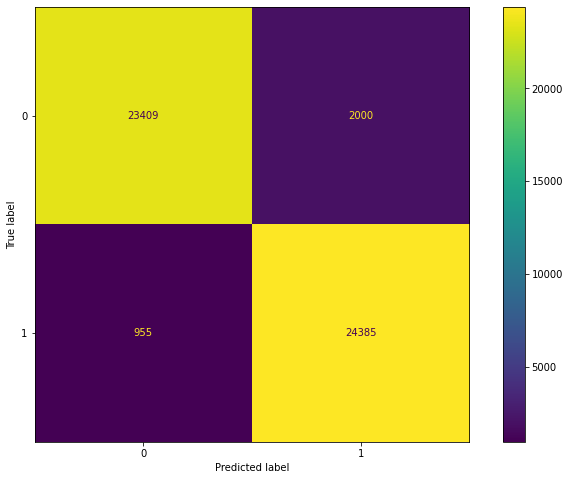

In [108]:
cm_b = confusion_matrix(y_test_b, y_pred_b)
display = ConfusionMatrixDisplay(confusion_matrix=cm_b)
display.plot()

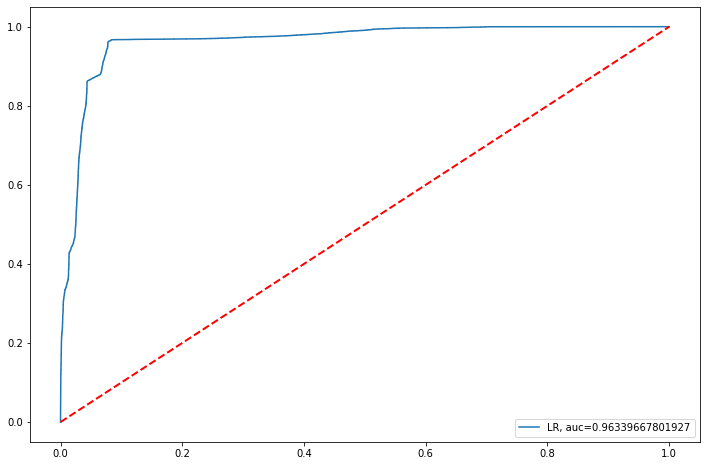

In [109]:
y_pred_proba_b = lr.predict_proba(x_test_b)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_b, y_pred_proba_b)
auc = metrics.roc_auc_score(y_test_b,y_pred_proba_b)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = 'LR, auc='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle='--')
plt.legend(loc=4)

In [110]:
# pandas_profiling.ProfileReport(df_balanceado)

### Correlações - Hipóteses

* Fraudes ocorrem mais pelo tipo "TRANSFER"

* Fraude e tempo estão altamente correlacionadas. A Fraude pode ocorrer em horários que não são o padrão do cliente.

* O cliente pode realizar transações mais no início do mês e acontecer movimentações fora desse período, sendo estas as fraudes.

### Árvore de decisão

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
# Árvores muito profundas podem resultar em overfitting:

ad = DecisionTreeClassifier(max_depth=5, random_state=SEED)

In [113]:
model_ad = ad.fit(x_train_b, y_train_b)
y_pred_ad = ad.predict(x_test_b)

In [114]:
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Acurácia - Balanceado - Logística:", metrics.accuracy_score(y_test_b, y_pred_b))
print("Acurácia - Balanceado - Árvore:", metrics.accuracy_score(y_test_b, y_pred_ad))

print("Precisão:", metrics.precision_score(y_test, y_pred))
print("Precisão - Balanceado - Logística:", metrics.precision_score(y_test_b, y_pred_b))
print("Precisão - Balanceado - Árvore:", metrics.precision_score(y_test_b, y_pred_ad))

print("Recall:", metrics.recall_score(y_test, y_pred))
print("Recall - Balanceado - Logística:", metrics.recall_score(y_test_b, y_pred_b))
print("Recall - Balanceado - Árvore:", metrics.recall_score(y_test_b, y_pred_ad))

print("F1:", metrics.f1_score(y_test, y_pred))
print("F1 - Balanceado - Logística:", metrics.f1_score(y_test_b, y_pred_b))
print("F1 - Balanceado - Árvore:", metrics.f1_score(y_test_b, y_pred_ad))

Acurácia: 0.9989765391276965
Acurácia - Balanceado - Logística: 0.9417722516699837
Acurácia - Balanceado - Árvore: 0.9622849711324362
Precisão: 0.2
Precisão - Balanceado - Logística: 0.9241993556945234
Precisão - Balanceado - Árvore: 0.9381639982043992
Recall: 0.043478260869565216
Recall - Balanceado - Logística: 0.9623125493291239
Recall - Balanceado - Árvore: 0.9897000789265983
F1: 0.07142857142857142
F1 - Balanceado - Logística: 0.9428709521507975
F1 - Balanceado - Árvore: 0.9632432017206943


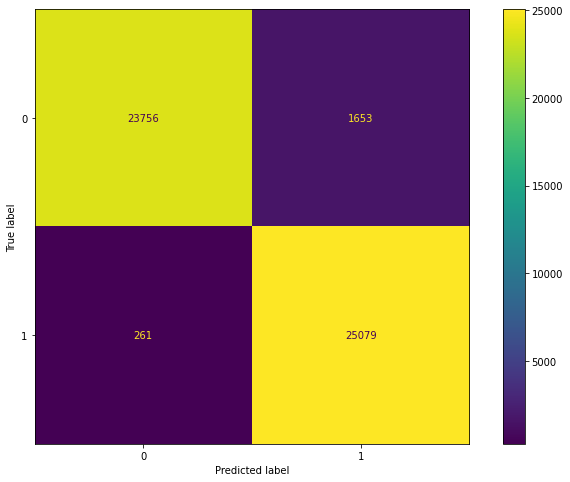

In [115]:
cm_ar = confusion_matrix(y_test_b, y_pred_ad)
display = ConfusionMatrixDisplay(confusion_matrix=cm_ar)
display.plot()

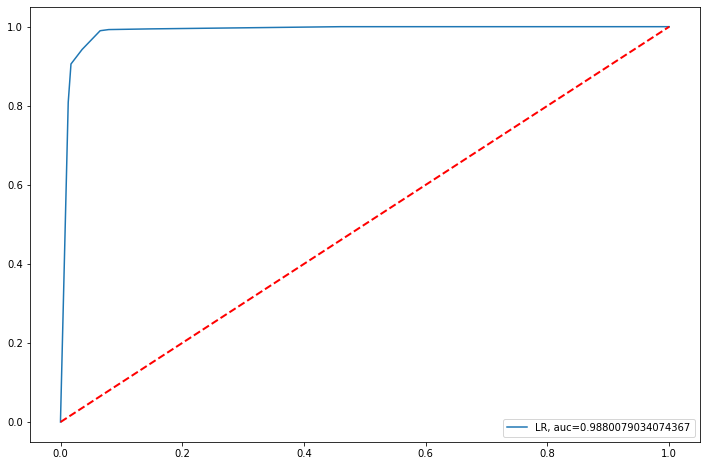

In [116]:
y_pred_proba_ar = ad.predict_proba(x_test_b)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_b, y_pred_proba_ar)
auc = metrics.roc_auc_score(y_test_b,y_pred_proba_ar)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = 'LR, auc='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle='--')
plt.legend(loc=4)

### Este modelo é ainda melhor do que a regresão logística

### Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf = RandomForestClassifier(max_depth=5, random_state=SEED)

In [119]:
model_rf = rf.fit(x_train_b, y_train_b)
y_pred_rf = ad.predict(x_test_b)

In [120]:
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Acurácia - Balanceado - Logística:", metrics.accuracy_score(y_test_b, y_pred_b))
print("Acurácia - Balanceado - Árvore:", metrics.accuracy_score(y_test_b, y_pred_ad))
print("Acurácia - Balanceado - Random Forest:", metrics.accuracy_score(y_test_b, y_pred_rf))

print("Precisão:", metrics.precision_score(y_test, y_pred))
print("Precisão - Balanceado - Logística:", metrics.precision_score(y_test_b, y_pred_b))
print("Precisão - Balanceado - Árvore:", metrics.precision_score(y_test_b, y_pred_ad))
print("Precisão - Balanceado - Random Forest:", metrics.precision_score(y_test_b, y_pred_rf))

print("Recall:", metrics.recall_score(y_test, y_pred))
print("Recall - Balanceado - Logística:", metrics.recall_score(y_test_b, y_pred_b))
print("Recall - Balanceado - Árvore:", metrics.recall_score(y_test_b, y_pred_ad))
print("Recall - Balanceado - Random Forest:", metrics.recall_score(y_test_b, y_pred_rf))

print("F1:", metrics.f1_score(y_test, y_pred))
print("F1 - Balanceado - Logística:", metrics.f1_score(y_test_b, y_pred_b))
print("F1 - Balanceado - Árvore:", metrics.f1_score(y_test_b, y_pred_ad))
print("F1 - Balanceado - Random Forest:", metrics.f1_score(y_test_b, y_pred_rf))

Acurácia: 0.9989765391276965
Acurácia - Balanceado - Logística: 0.9417722516699837
Acurácia - Balanceado - Árvore: 0.9622849711324362
Acurácia - Balanceado - Random Forest: 0.9622849711324362
Precisão: 0.2
Precisão - Balanceado - Logística: 0.9241993556945234
Precisão - Balanceado - Árvore: 0.9381639982043992
Precisão - Balanceado - Random Forest: 0.9381639982043992
Recall: 0.043478260869565216
Recall - Balanceado - Logística: 0.9623125493291239
Recall - Balanceado - Árvore: 0.9897000789265983
Recall - Balanceado - Random Forest: 0.9897000789265983
F1: 0.07142857142857142
F1 - Balanceado - Logística: 0.9428709521507975
F1 - Balanceado - Árvore: 0.9632432017206943
F1 - Balanceado - Random Forest: 0.9632432017206943


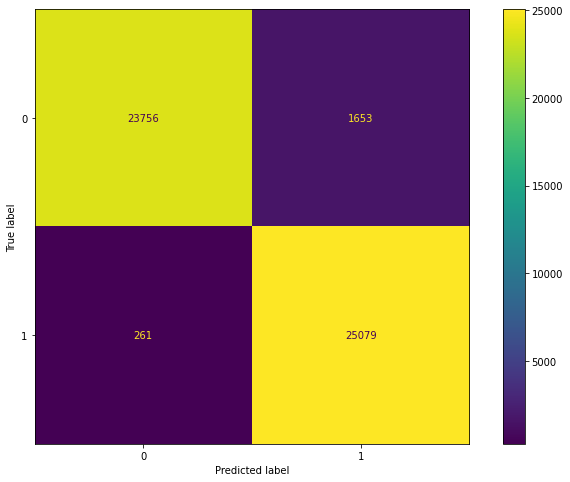

In [121]:
cm_rf = confusion_matrix(y_test_b, y_pred_rf)
display = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
display.plot()

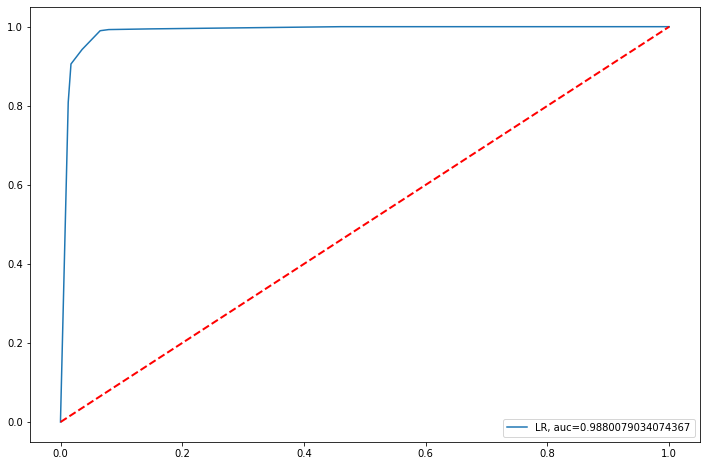

In [122]:
y_pred_proba_rf = ad.predict_proba(x_test_b)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_b, y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test_b,y_pred_proba_rf)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = 'LR, auc='+str(auc))
plt.plot([0,1],[0,1], color = 'red', lw = 2, linestyle='--')
plt.legend(loc=4)

Árvore de decisão é um dos modelos de previsão mais simples, inspirado na forma que os seres humanos tomam decisões. Essas árvores podem ser utilizadas tanto para modelos de regressão, que têm intuito de prever valores numéricos, quanto para modelos de classificação, que têm o objetivo de prever categorias.

Ela pode ser representada graficamente, de forma que cada uma das decisões tomadas no processo possam ser visualizadas. Mas, conforme aumentamos a quantidade de variáveis envolvidas na análise, se torna inviável essa visualização.

Os elementos principais da árvore de decisão são os nós, ramos e folhas. A estrutura da árvore se inicia com um nó inicial, também chamado de raiz. A partir dela são traçadas ramificações que geram novos nós e o processo se repete para os nós subsequentes até que chegue a uma folha. Essa se trata de um nó especial e tem a informação da resposta, podendo ser uma categoria ou um valor previsto.

Cada ramo representa uma tomada de decisão a partir de um valor ou categoria das variáveis explicativas, dividindo o conjunto de dados em nós que apresentam dados com características cada vez mais similares entre si.

As árvores de decisão possuem uma característica que as impede de serem consideradas como ferramenta ideal: a imprecisão. Isso quer dizer que elas funcionam muito bem com os dados utilizados para criá-las, mas não tão bem para realizar a classificação de novas amostras. A floresta aleatória (Random Forest) busca resolver esse problema de overfitting (sobreajuste).

O algoritmo Random Forest se baseia na utilização de diversas árvores de decisão para encontrar o resultado. Como essa árvore pode ser usada para regressão e classificação, o Random Forest também pode ser utilizado para os dois tipos de problemas. Vamos nos concentrar aqui nos problemas de classificação.

Para realizar a previsão, o algoritmo cria diversas árvores de decisão no conjunto de dados e é realizada a predição para cada uma delas. Internamente, é feita uma “votação” para analisar qual predição tem maior ocorrência e, então, essa predição torna-se a resposta final.

Se fosse utilizada a mesma base de dados na criação de todas as árvores de decisão do Random Forest, as respostas de cada uma delas seriam iguais e o resultado da votação seria idêntico a realizar um único modelo de árvore de decisão. Para evitar esse problema, é utilizada uma técnica chamada bootstraping.

Essa técnica consiste em fazer amostragens com reposição do conjunto de dados original e cada uma delas será usada para uma árvore de decisão diferente. A amostragem com reposição significa que, ao sortearmos um elemento, isso não nos impede que ele mesmo apareça em sorteios futuros. Dessa forma, as árvores terão resultados distintos, uma vez que são treinadas com conjuntos de dados diferentes e, na amostragem com repetição, as observações da tabela poderão ficar de fora e outras estarão duplicadas.

### Visualizando as informações dos 3 modelos testados

In [123]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

LogisticRegression
****Resultados****
Accuracy: 0.9989765391276965
Precision: 0.2
Recall: 0.043478260869565216
F1: 0.07142857142857142
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9993308140450323
Precision: 0.875
Recall: 0.30434782608695654
F1: 0.4516129032258065
RandomForestClassifier
****Resultados****
Accuracy: 0.9991339946465123
Precision: 1.0
Recall: 0.043478260869565216
F1: 0.08333333333333333


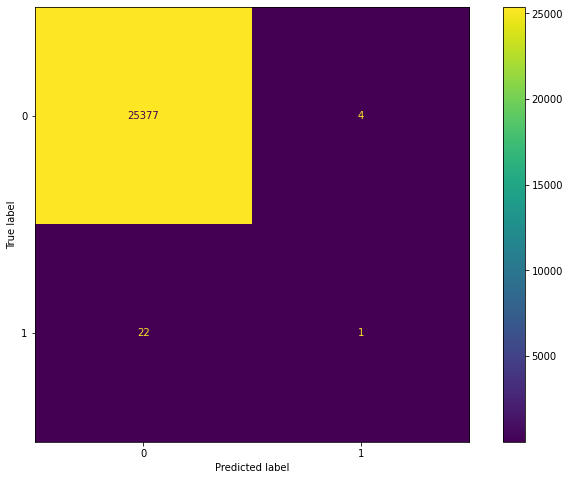

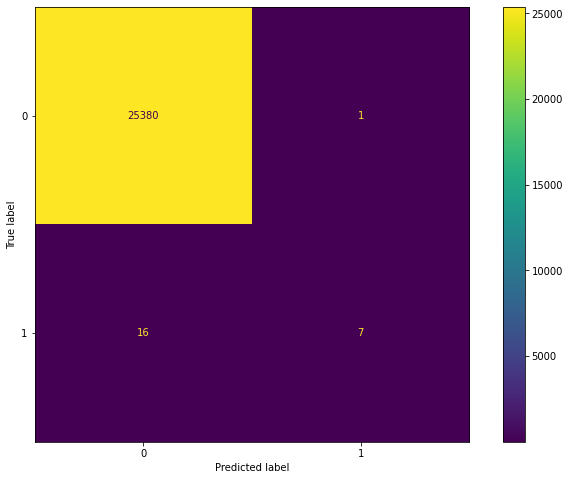

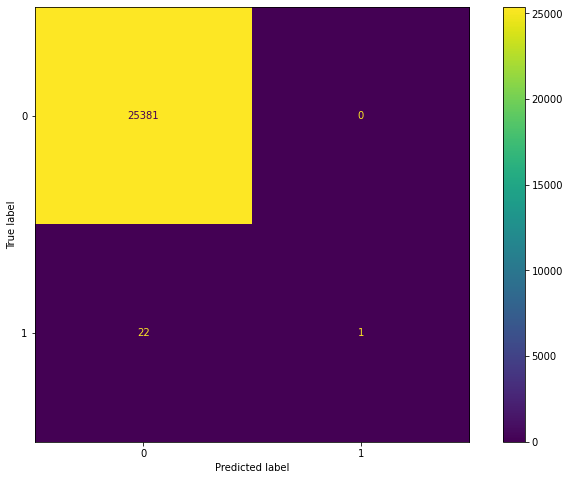

In [124]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1:", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()


### Melhorando o modelo Random Forest

***
### Hiperparâmetros:

Dentre os parâmetros que podem ser modificados no modelo Random Forest, estão o criterion e as max_features. Vamos analisar o que cada um desses parâmetros faz.

* Criterion:
Tem a função de medir a qualidade das divisões dos nós das árvores de decisão. As opções possíveis para esse parâmetro são ”gini” ou ”entropy”.

> Gini:
O critério de impureza Gini,ou somente Gini, serve para medir a frequência com que um elemento escolhido aleatoriamente pode ser identificado incorretamente. Isso significa que quanto menor o valor, mais puros são os dados e menor o erro cometido. [Mais aqui](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

> Entropia:
O critério de entropia (ou entropy) para ganho de informação é o menor número médio de perguntas binárias (sim ou não) necessário para identificar a saída de uma fonte. Esse valor informa quão informativas são as características para serem selecionadas. Desse modo, quanto maior a entropia, maior o conteúdo da informação. [Mais aqui](https://en.wikipedia.org/wiki/Entropy_%28information_theory%29)

* max_features:
É a quantidade máxima de variáveis que pode ser utilizada para fazer as divisões dos nós das árvores. As opções possíveis para esse parâmetro são ”auto”, ”sqrt” , ”log2” ou valores numéricos.

Caso sejam escolhidas as opções “auto” ou “sqrt”, o número máximo de variáveis será a raiz quadrada da quantidade de variáveis de treinamento.
Escolhendo a opção “log2”, será extraído o logaritmo na base 2 da quantidade de variáveis de treinamento.
E para o caso dos valores numéricos, o número máximo de variáveis que podem ser usadas nas divisões dos nós será igual ao valor utilizado.

* [Validação Cruzada](https://www.alura.com.br/artigos/conhecendo-a-validacao-cruzada)

### Testando hiperparâmetros com o RandomizedSearchCV

In [125]:
n_estimators = np.arange(20, 200, step = 20)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(2,10, step = 1))
min_samples_split = np.arange(2,10, step=2)
min_samples_leaf = [1,2,4]
bootstrap = [True, False]

In [126]:
param_grid = { 
    'n_estimators': n_estimators,
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth': max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'bootstrap' : bootstrap} 
    

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [128]:
SEED2 = 70

rf = RandomForestClassifier(random_state = SEED2)

In [129]:
random_cv = RandomizedSearchCV(rf, param_grid, n_iter = 5, cv = 3, scoring = "recall", n_jobs=-1, random_state = SEED2)

In [130]:
%%time

rcv = random_cv.fit(X_b, Y_b)

/home/silsantos/anaconda3/envs/coamo/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/silsantos/anaconda3/envs/coamo/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/silsantos/anaconda3/envs/coamo/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sq

CPU times: user 16.6 s, sys: 143 ms, total: 16.7 s
Wall time: 45.8 s


In [131]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,26.652400,0.766238,0.460751,0.018428,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.991665,0.999438,0.992817,0.994640,0.003425,2
1,11.064922,0.162315,0.684304,0.037753,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.914223,0.936009,0.862704,0.904312,0.030736,5
2,11.309276,0.400471,0.282470,0.034998,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.980285,1.000000,0.973812,0.984699,0.011138,3
3,21.235008,2.618653,0.616398,0.149206,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.993497,0.999025,0.992226,0.994916,0.002951,1
4,12.669969,1.026514,0.583743,0.085476,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.914223,0.943487,0.876537,0.911416,0.027404,4


### Verificando os melhores parâmetros

In [132]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

### Utilizando os melhores parâmetros

In [133]:
rf_novo = RandomForestClassifier(**rcv.best_params_, random_state=SEED2)

modelo = rf_novo.fit(x_train_b, y_train_b)
y_pred = rf_novo.predict(x_test_b)

In [135]:
print("Acurácia - Balanceado - Random Forest - Best Params:", metrics.accuracy_score(y_test_b, y_pred))
print("Precisão - Balanceado - Random Forest - Best Params:", metrics.precision_score(y_test_b, y_pred))
print("Recall - Balanceado - Random Forest - Best Params:", metrics.recall_score(y_test_b, y_pred))
print("F1 - Balanceado - Random Forest - Best Paramns:", metrics.f1_score(y_test_b, y_pred))

Acurácia - Balanceado - Random Forest - Best Params: 0.9915860411042582
Precisão - Balanceado - Random Forest - Best Params: 0.9906258615936036
Recall - Balanceado - Random Forest - Best Params: 0.9925414364640884
F1 - Balanceado - Random Forest - Best Paramns: 0.9915827238857459


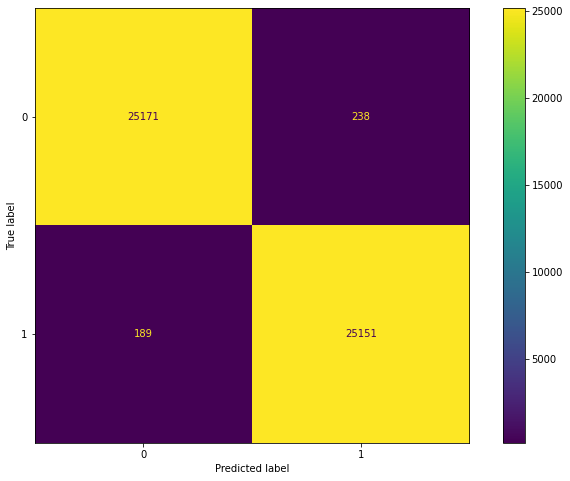

In [136]:
cm_rf_novo = confusion_matrix(y_test_b, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm_rf_novo)
display.plot()

### Note que os falsos positivos foram para 189 e os falsos negativos estão em 238. Só estão passando 189 fraudes.